<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_08/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08



<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_08/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [3]:
df_num = df[["year","desplazamiento","cilindros","co2","consumo_litros_milla"]] #variables numericas

for columna in df_num.columns:
  df_num.loc[df_num[columna].isnull(), columna] = df_num[columna].mean()

df_num.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984.0,2.5,4.0,522.764706,0.222671
1,1984.0,4.2,6.0,683.615385,0.291185
2,1985.0,2.5,4.0,555.437500,0.236588
3,1985.0,4.2,6.0,683.615385,0.291185
4,1987.0,3.8,6.0,555.437500,0.236588


In [4]:
scaler = MinMaxScaler()
columns = df_num.columns
df_num[columns] = scaler.fit_transform(df_num[columns])

df_num.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


In [5]:
df_cat = df[["clase_tipo","traccion_tipo","transmision_tipo","combustible_tipo","tamano_motor_tipo","consumo_tipo","co2_tipo"]] #variables categoricas
df_cat = pd.get_dummies(df_cat)
df_cat.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [6]:
df_procesado = pd.merge(df_num,df_cat,left_index=True,right_index=True)
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas
    
    

In [7]:
#ajustamos el modelo
X = np.array(df_procesado)
kmeans = KMeans(n_clusters=8,n_init=25, random_state=123)
kmeans.fit(X)


centroids = kmeans.cluster_centers_ 
clusters = kmeans.labels_ 

In [9]:
# etiquetamos los datos con los clusters encontrados
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids, columns=['year', 'desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla',
       'clase_tipo_Camionetas', 'clase_tipo_Coche Familiar',
       'clase_tipo_Coches Grandes', 'clase_tipo_Coches Medianos',
       'clase_tipo_Coches pequeños', 'clase_tipo_Deportivos',
       'clase_tipo_Furgoneta', 'clase_tipo_Vehículos Especiales',
       'traccion_tipo_cuatro', 'traccion_tipo_dos',
       'transmision_tipo_Automatica', 'transmision_tipo_Manual',
       'combustible_tipo_Hibrido', 'combustible_tipo_Normal',
       'combustible_tipo_Otros tipos de combustible',
       'combustible_tipo_Premium', 'tamano_motor_tipo_grande',
       'tamano_motor_tipo_mediano', 'tamano_motor_tipo_muy grande',
       'tamano_motor_tipo_muy pequeño', 'tamano_motor_tipo_pequeño',
       'consumo_tipo_alto', 'consumo_tipo_bajo', 'consumo_tipo_moderado',
       'consumo_tipo_muy alto', 'consumo_tipo_muy bajo', 'co2_tipo_alto',
       'co2_tipo_bajo', 'co2_tipo_moderado', 'co2_tipo_muy alto',
       'co2_tipo_muy bajo'])
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,6
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,3
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,6
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,3
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,6


In [10]:
df_procesado.columns

Index(['year', 'desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla',
       'clase_tipo_Camionetas', 'clase_tipo_Coche Familiar',
       'clase_tipo_Coches Grandes', 'clase_tipo_Coches Medianos',
       'clase_tipo_Coches pequeños', 'clase_tipo_Deportivos',
       'clase_tipo_Furgoneta', 'clase_tipo_Vehículos Especiales',
       'traccion_tipo_cuatro', 'traccion_tipo_dos',
       'transmision_tipo_Automatica', 'transmision_tipo_Manual',
       'combustible_tipo_Hibrido', 'combustible_tipo_Normal',
       'combustible_tipo_Otros tipos de combustible',
       'combustible_tipo_Premium', 'tamano_motor_tipo_grande',
       'tamano_motor_tipo_mediano', 'tamano_motor_tipo_muy grande',
       'tamano_motor_tipo_muy pequeño', 'tamano_motor_tipo_pequeño',
       'consumo_tipo_alto', 'consumo_tipo_bajo', 'consumo_tipo_moderado',
       'consumo_tipo_muy alto', 'consumo_tipo_muy bajo', 'co2_tipo_alto',
       'co2_tipo_bajo', 'co2_tipo_moderado', 'co2_tipo_muy alto',
       'co2_tipo_muy 

In [11]:
#obtenemos el promedio directamente desde df_procesado
grupo = df_procesado.groupby("cluster")
df_prom = grupo[["year","desplazamiento","cilindros","co2","consumo_litros_milla"]].mean()
df_prom = scaler.inverse_transform(df_prom)
df_prom = pd.DataFrame(df_prom, columns=["year","desplazamiento","cilindros","co2","consumo_litros_milla"])
df_prom

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,2007.653876,1.999352,4.110189,326.958383,0.139832
1,2001.827093,2.556068,4.737610,406.608830,0.172998
2,1997.913121,3.203095,5.611500,468.387496,0.198988
3,1997.064021,5.167600,8.031159,662.049423,0.281385
4,1998.905729,1.844695,3.976570,329.574690,0.139685
5,1999.383070,4.989295,7.677866,651.626738,0.275718
6,2000.212957,4.117148,6.581356,537.580217,0.228485
7,2003.994204,3.424546,6.192540,468.246522,0.199460


In [14]:
#obtenemos la moda desde df 
df["cluster"] = clusters
grupo = df[["clase_tipo","traccion_tipo","transmision_tipo","combustible_tipo","tamano_motor_tipo","consumo_tipo","co2_tipo","cluster"]].groupby("cluster")
df_moda = grupo.agg(pd.Series.mode)
df_moda

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
cluster,,,,,,,
0,Coches pequeños,dos,Automatica,Normal,muy pequeño,muy bajo,muy bajo
1,Coches pequeños,dos,Automatica,Normal,pequeño,bajo,bajo
2,Coches pequeños,dos,Automatica,Normal,mediano,moderado,moderado
3,Furgoneta,dos,Automatica,Normal,muy grande,muy alto,muy alto
4,Coches pequeños,dos,Manual,Normal,muy pequeño,muy bajo,muy bajo
5,Camionetas,cuatro,Automatica,Normal,muy grande,muy alto,muy alto
6,Camionetas,dos,Automatica,Normal,grande,alto,alto
7,Coches pequeños,dos,Automatica,Premium,mediano,moderado,moderado


A partir de los DataFrame obtenidos, es difícil visualizar con precisión los cluster que se formaron debido a la gran cantidad de variables a considerar, además de la posible correlación entre algunas de ellas. Sin embargo, se puede notar por lo menos que ningún cluster tiene la misma moda para todas sus variables categóricas ni promedios muy similares para todas sus variables numéricas

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [15]:
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,127152.232822
1,10,83273.996974
2,20,66846.034921
3,30,56502.441228
4,50,45273.505882


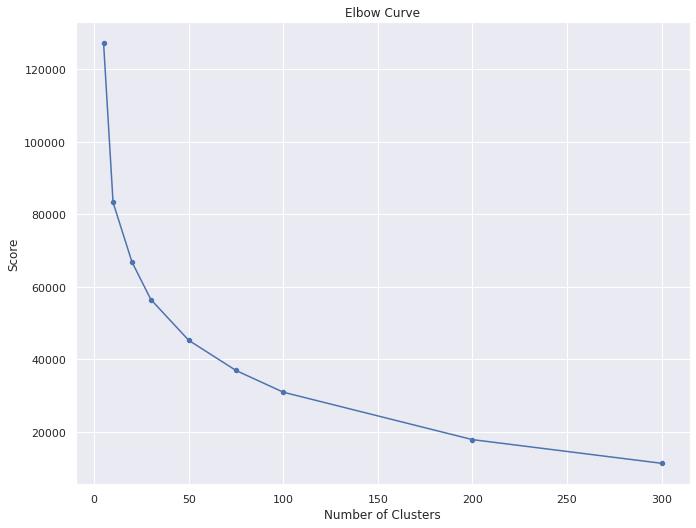

In [16]:
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

Considerando la regla del codo, el número adecuado de clusters se encuentra entre 50 y 100.
Esto explica en parte por qué algunos valores de variables categóricas no eran moda de ningún cluster, ya que el número utilizado (8) es mucho menor del ideal.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 

El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [17]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [18]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
#funciones para escalar y otras
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

En primer lugar determinamos el número adecuado de componentes principales para la situación.

In [20]:
#escalamos los datos y ajustamos el modelo
datos = iris[features]
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

modelo_pca = pca_pipe.named_steps['pca']


In [21]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4'] #son 4 porque hay 4 variables
)

,sepal_length,sepal_width,petal_length,petal_width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


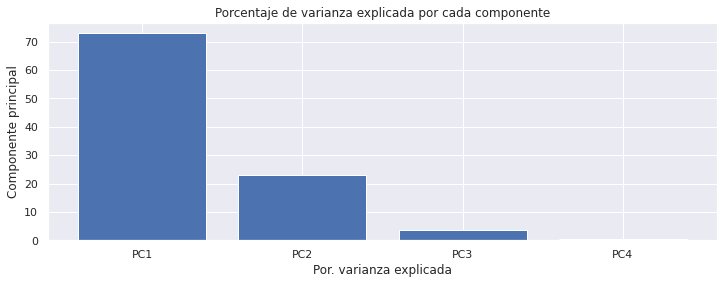

In [22]:
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

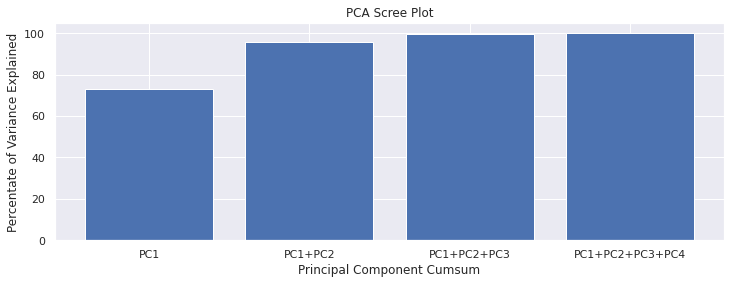

In [23]:
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

Como las primeras dos componentes explican la mayor parte de la varianza (aprox. el 95%), solo se necesitan estas para ajustar el modelo. \
A continuación, ajustaremos el modelo considerando dos componentes.

In [24]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=2))
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [25]:
#e obtienen los datos proyectados sobre el subespacio de dimensión 2
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2'],
    index   = datos.index
)
proyecciones["label"] = iris[target]
proyecciones.head()

,PC1,PC2,label
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


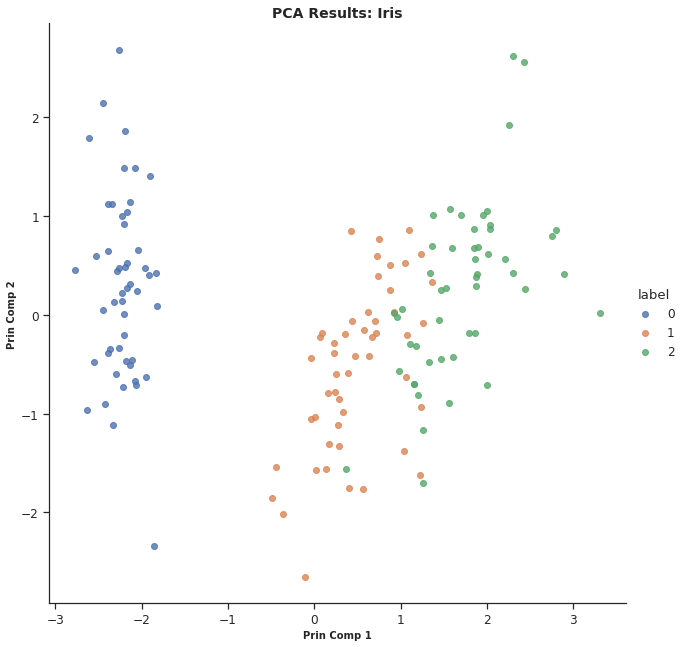

In [26]:
#Como la dimensión es 2, podemos graficar
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='PC1',
           y='PC2',
           data=proyecciones,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           #scatter_kws={"s":200, "alpha":0.3}
           )

plt.title('PCA Results: Iris', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

Ahora repetiremos el análisis anterior con tSNE, utilizando también dos componentes para poder comparar. 

In [27]:
datos = iris[features]
tsne_pipe = make_pipeline(StandardScaler(), TSNE(n_components=2))
tsne_pipe.fit(datos)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Pipeline(steps=[('standardscaler', StandardScaler()), ('tsne', TSNE())])

In [28]:
proyecciones = tsne_pipe.fit_transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['dim1', 'dim2'],
    index   = datos.index
)
proyecciones["label"] = iris[target]
proyecciones.head()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,dim1,dim2,label
0,22.265060,-14.041986,0
1,19.096384,-12.136657,0
2,19.628168,-13.410341,0
3,18.933765,-13.171324,0
4,22.516209,-14.727571,0


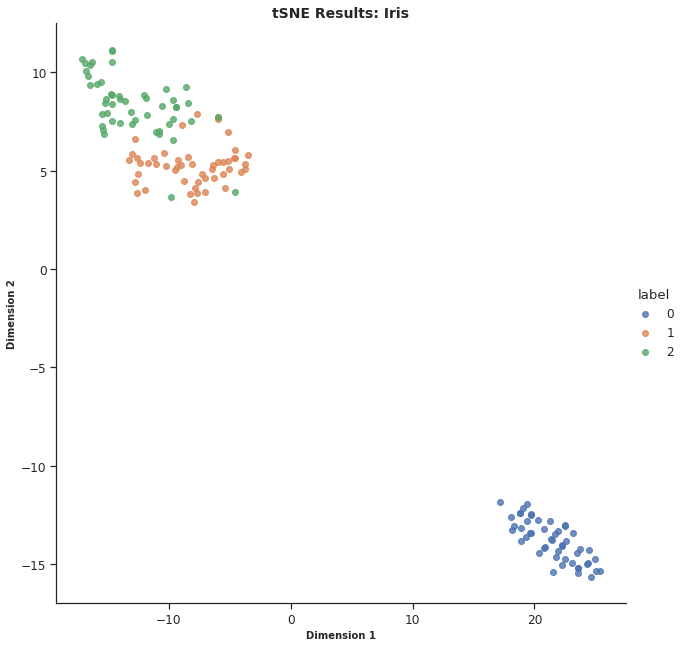

In [29]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='dim1',
           y='dim2',
           data=proyecciones,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           #scatter_kws={"s":200, "alpha":0.3}
           )

plt.title('tSNE Results: Iris', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

Ambos gráficos producen resultados similares, identificando correctamente el cluster formado por una de las especies pero sin poder alejar de manera óptima las otras dos. \
Aún así, podemos observar que tSNE presenta errores más pequeños, por lo que es un mejor modelo para esta situación.